# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [2]:
%run load_dataset.ipynb

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2001's data
Loading 2002's data
Finished loading


# Data Preprocessing

In [3]:
%run preprocess_for_NN.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [4]:
print(X_all.shape, y_all.shape)

(27942, 3) (27942,)


# Group Data by Label and Normalize Data

In [5]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [6]:
# denoise the signal using wavelet transform
# wavelet_output = wavelet_smooth(X_all)
# X_w = np.array(wavelet_output)

In [7]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [8]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

In [9]:
plot_all_label(X_label, y_all, new_label_list, new_label_dict)

plotting  sit


IndexError: list index out of range

# Calculate Roll, Pitch, Yaw

In [10]:
roll, pitch, yaw = calc_rpy(X_all, subject_id, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape)

(27942, 3)


# Apply PCA and LDA

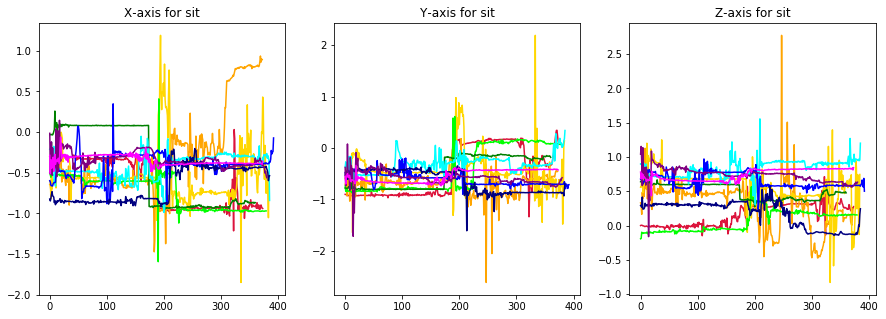

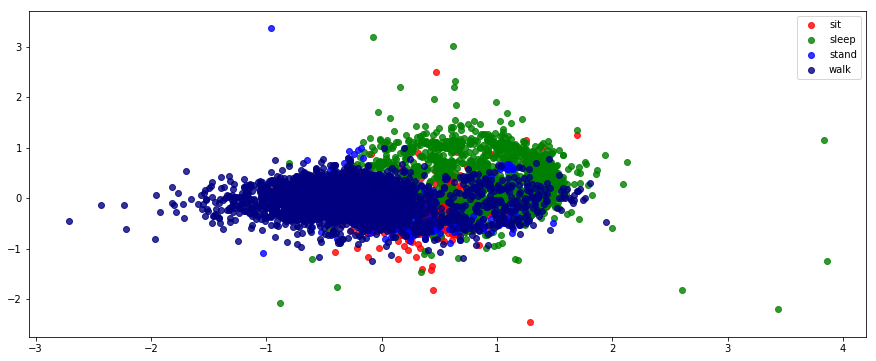

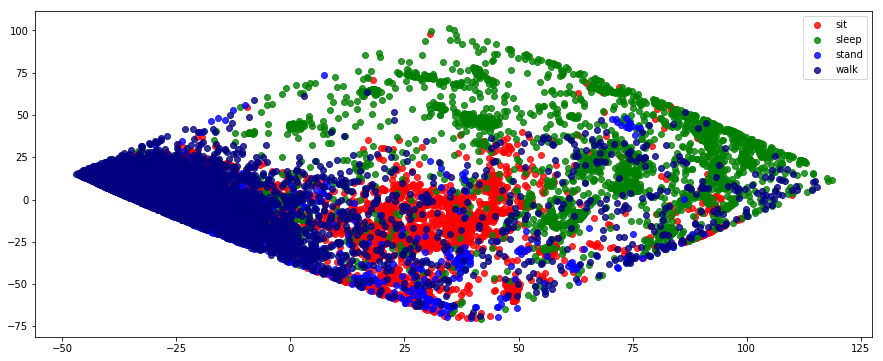

In [11]:
# apply PCA and LDA to X_norm and rpy
X_pca = apply_pca(X_all, y_all, label_list)
rpy_pca = apply_pca(rpy, y_all, label_list)

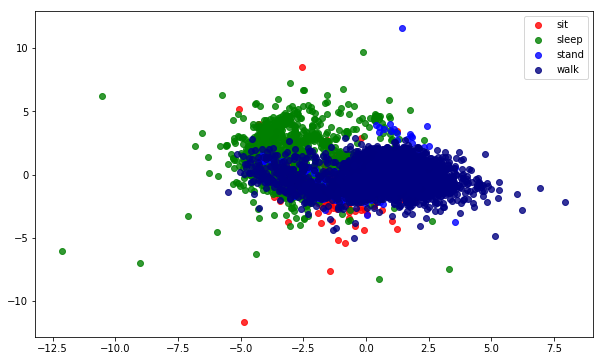

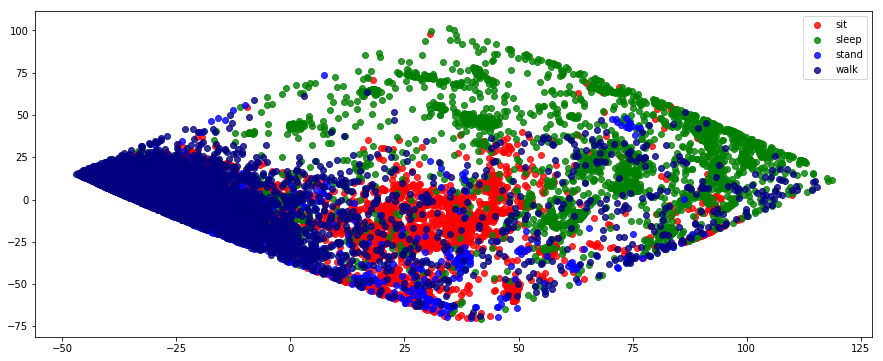

In [12]:
X_lda = apply_lda(X_all, y_all, label_list)
rpy_lda = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [13]:
# get label-separated X and y
X_svm, y_svm = prepare_pure_label(X_pca, y_all, subj_all, new_label_list)
y_svm = y_svm.reshape((y_svm.shape[0],))

In [14]:
print(X_svm.shape, y_svm.shape)

(24638, 180) (24638,)


# Reshape Data (Impure Label)

In [15]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [16]:
print(X_impure.shape, y_impure.shape)

(27883, 180) (27883,)


# Split Train and Test Set

In [17]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.3, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(19518, 180)
(8365, 180)


In [18]:
print(X_train.shape)
print(X_test.shape)

(17246, 180)
(7392, 180)


# SVM

In [19]:
svm_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [20]:
y_pred_svm = svm_model.predict(X_test)

In [21]:
svm_model_2 = nn_classifier(X_tr, y_tr)
print("Finished training")

Finished training


## KNN Evaluation

In [22]:
%run eval_score.ipynb

In [23]:
LABELS = ['sit','sleep','stand','walk']

0.82913961039


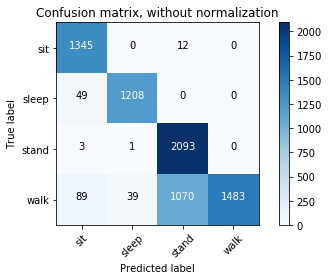

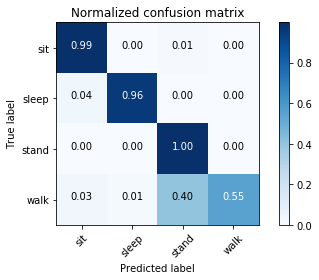

             precision    recall  f1-score   support

        sit       0.91      0.99      0.95      1357
      sleep       0.97      0.96      0.96      1257
      stand       0.66      1.00      0.79      2097
       walk       1.00      0.55      0.71      2681

avg / total       0.88      0.83      0.82      7392



In [24]:
acc = accuracy_score(y_test, y_pred_svm)
print(acc)

show_conf_matrix(y_test, y_pred_svm, LABELS)
show_clf_report(y_test, y_pred_svm, LABELS)

# Walk Algorithm

In [25]:
%run classifier_alg.ipynb

In [26]:
# classify walking
walk = calc_walk(X_all)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

# walk_stairs_exact_p = get_exact_walk_stairs(y_all)
walk_exact_p = get_exact_walk(y_all)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all)
# walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all)

## Walk Algorithm Evaluation

In [27]:
walk_lbl = ['NaN','walk']

0.923162264691


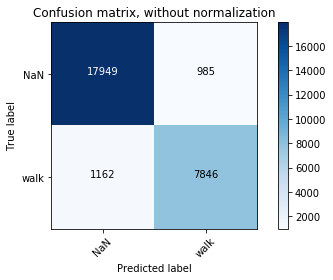

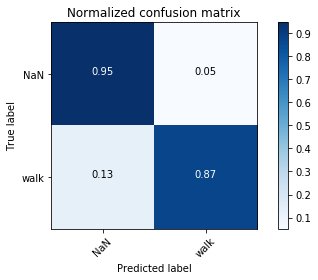

             precision    recall  f1-score   support

        NaN       0.94      0.95      0.94     18934
       walk       0.89      0.87      0.88      9008

avg / total       0.92      0.92      0.92     27942



In [28]:
acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine KNN and Walk Algorithm

In [29]:
y_pred_new = combine(X_test, y_pred_svm)

0.931547619048


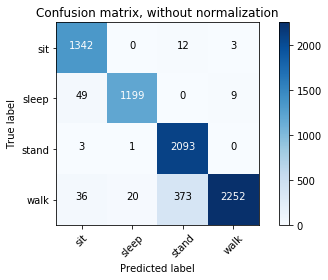

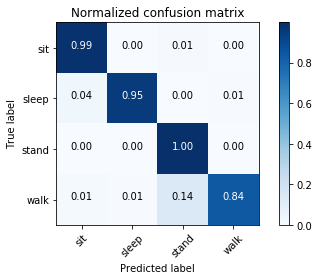

             precision    recall  f1-score   support

        sit       0.94      0.99      0.96      1357
      sleep       0.98      0.95      0.97      1257
      stand       0.84      1.00      0.91      2097
       walk       0.99      0.84      0.91      2681

avg / total       0.94      0.93      0.93      7392



In [30]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subject

Loading 1001's data
Finished prediction


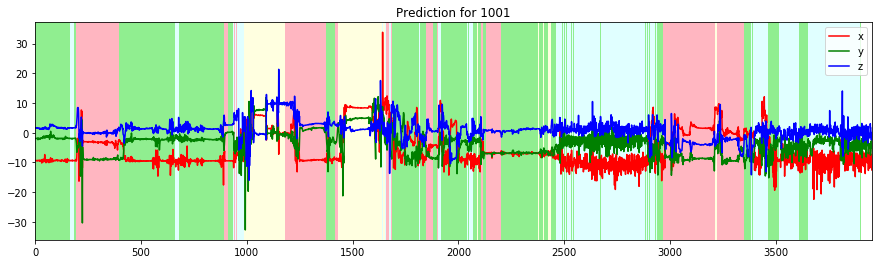

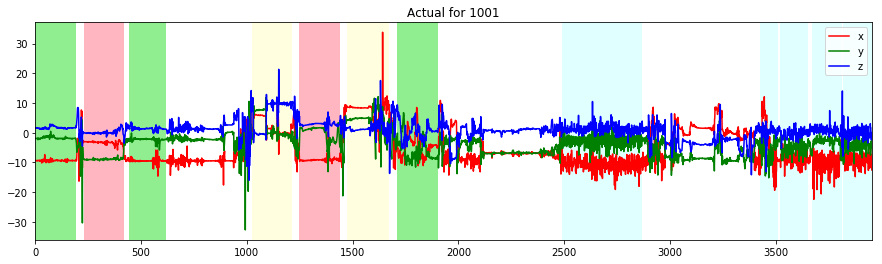

Loading 1002's data
Finished prediction


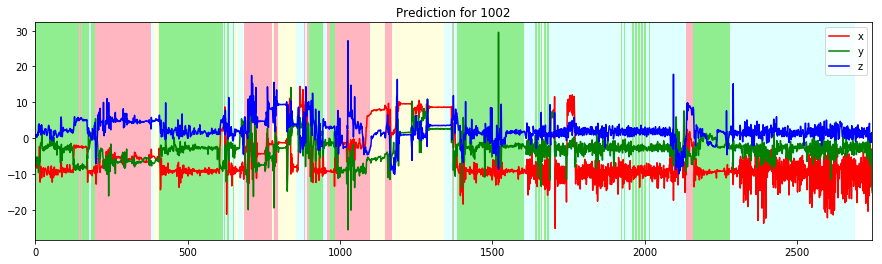

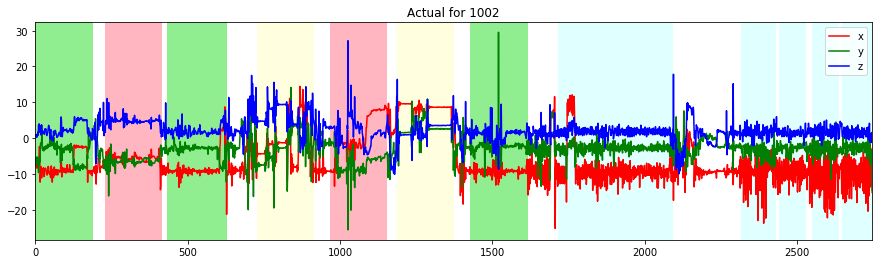

Loading 1003's data
Finished prediction


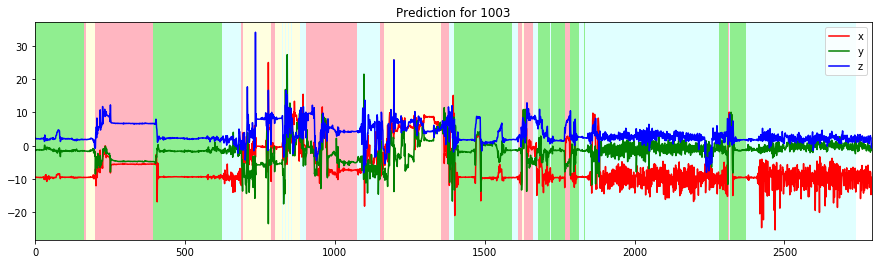

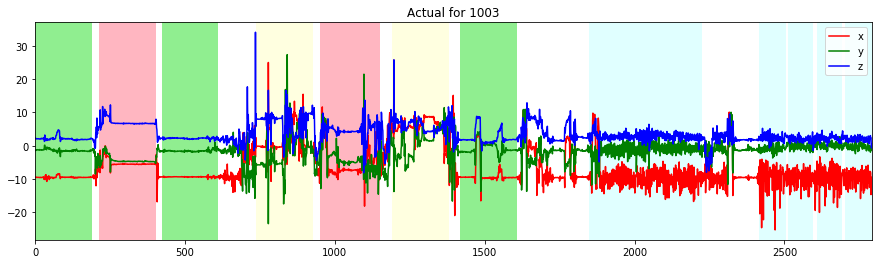

Loading 1004's data
Finished prediction


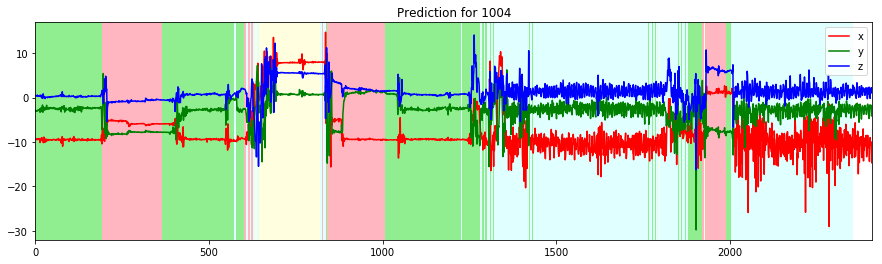

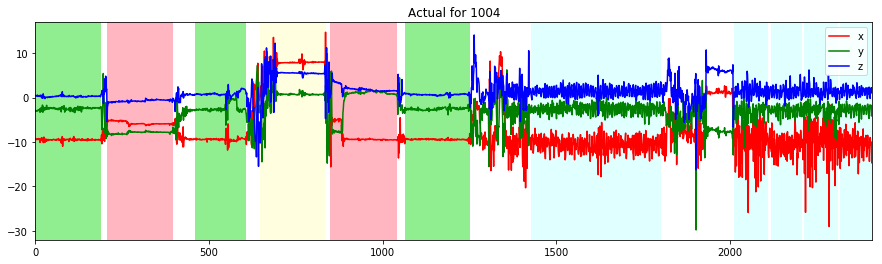

Loading 1005's data
Finished prediction


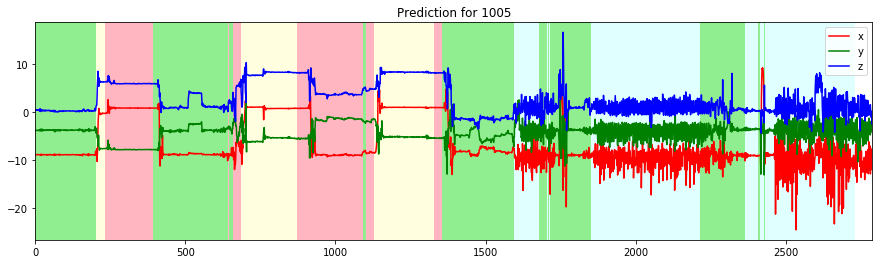

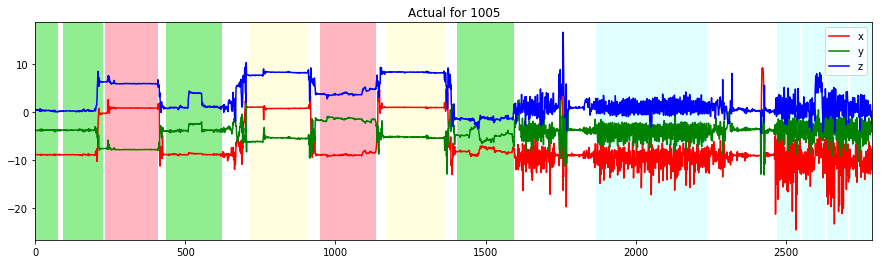

Loading 1006's data
Finished prediction


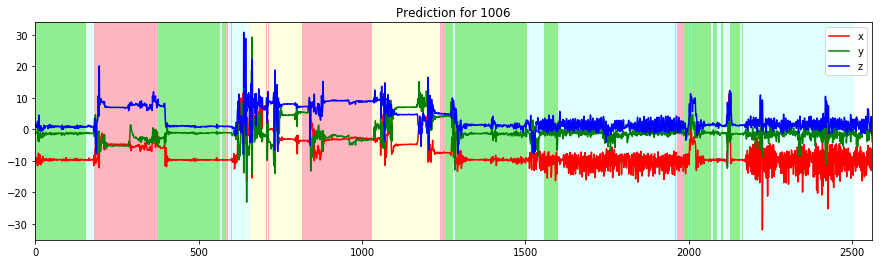

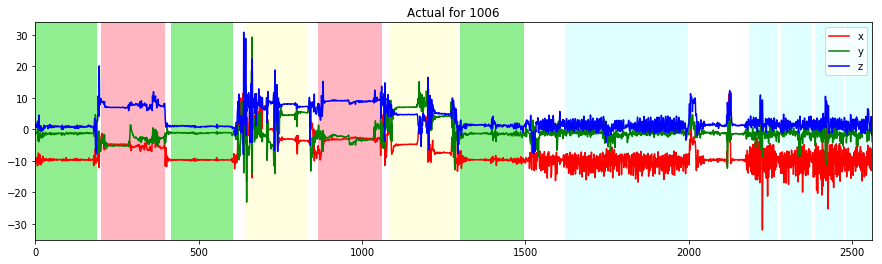

Loading 1007's data
Finished prediction


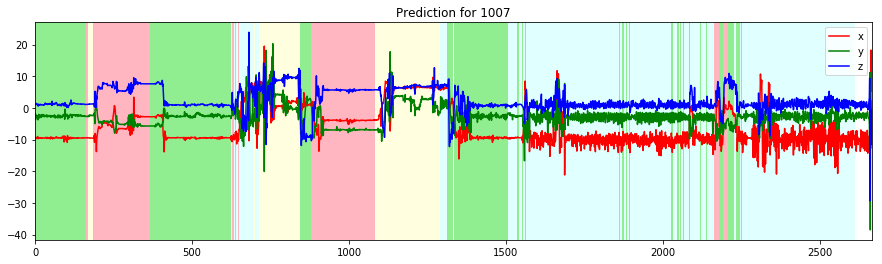

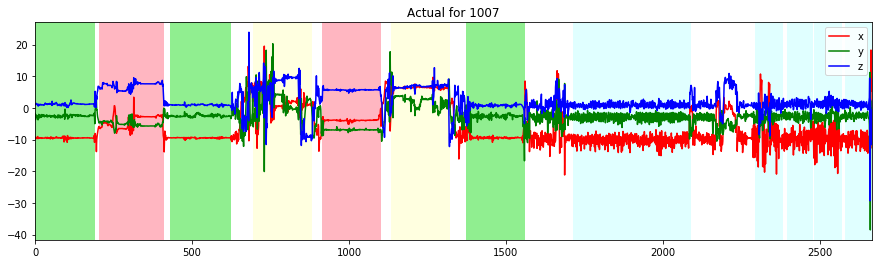

Loading 2001's data
Finished prediction


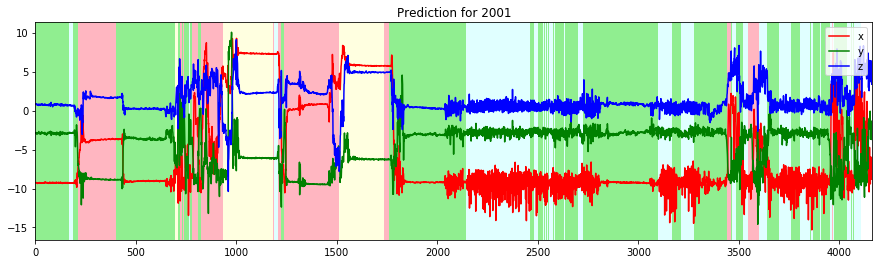

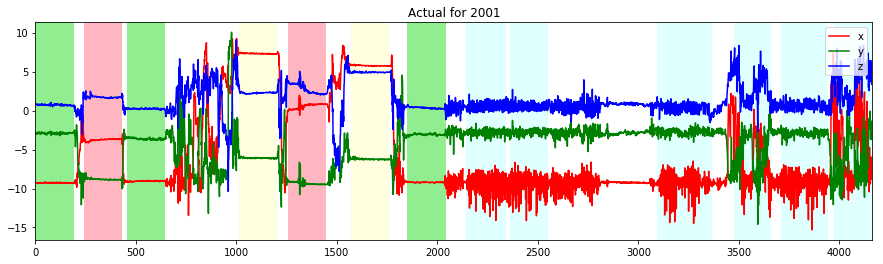

Loading 2002's data
Finished prediction


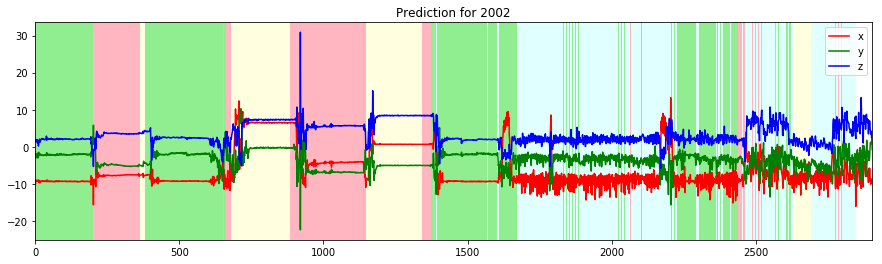

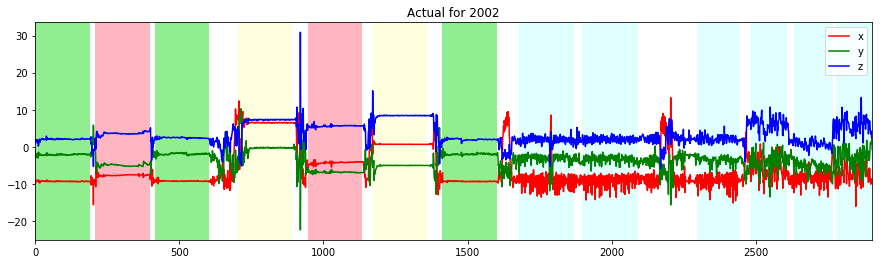

In [31]:
%run test_SVM_model.ipynb

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
    if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
        t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
df_sid[cols]

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Seconds', 'Percentage'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], total_secs[i], percent_secs[i]])

tb.add_row(['', '', ''])
tb.add_row(['total', round(np.sum(total_secs), 3), round(np.sum(percent_secs), 3)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')
old_labels_list = ['sit', 'sleep', 'stand', 'walk']

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(old_labels_list)):
    lb = old_labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])

total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Seconds', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, dura_dict[lb], round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', round(total_dura, 3), np.sum(percent_list)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

df_all

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + test_subj)

plt.show()